# Constrain Plots

This notebook contains code used to make constraint plots.

## Setup and utils

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from gecko import config as mpl_conf
from hazma.cmb import vx_cmb
from hazma.parameters import muon_mass as mmu

color_dict = mpl_conf.COLOR_DICT
linestyles = mpl_conf.MPL_LINESTYLES
existings = mpl_conf.EXISTINGS
gecco_anns = mpl_conf.GECCO_ANNS
gecco_decs = mpl_conf.GECCO_DECS
label_dict = mpl_conf.LABEL_DICT

In [24]:
fig = plt.figure(dpi=150)

<Figure size 900x600 with 0 Axes>

## Annihilation

In [39]:
ANN_DATA_FILE = "../results/single_channel_ann.hdf5"
datafile_ann = h5py.File(ANN_DATA_FILE, "r")

In [40]:
datafile_ann.keys()

<KeysViewHDF5 ['e e', 'g g', 'mu mu', 'pi pi']>

NameError: name 'geccos' is not defined

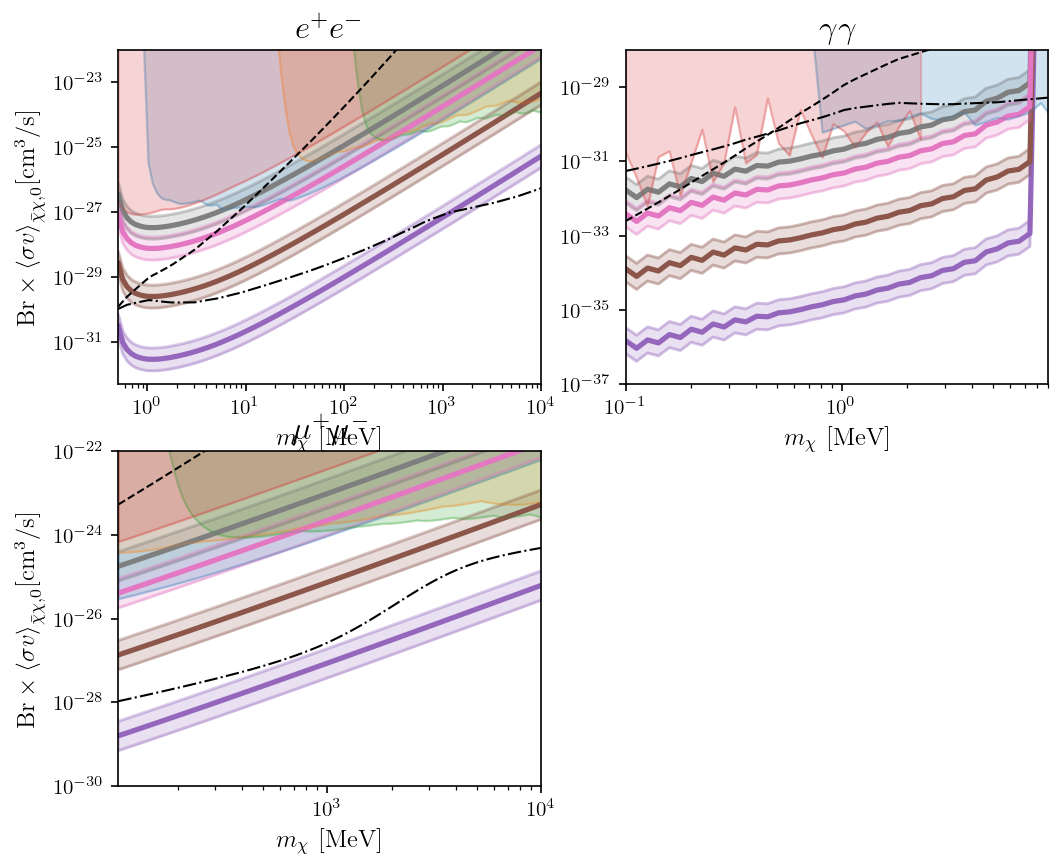

In [3]:
ANN_DATA_FILE = "../results/single_channel_ann.hdf5"
datafile_ann = h5py.File(ANN_DATA_FILE, "r")


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6.5))
fig.dpi = 150
axes_idxs = [(0, 0), (0, 1), (1, 0)]
last_axis = axes[1][1]
ylabel = r"$\mathrm{Br}\times{\langle\sigma v\rangle}_{\bar{\chi}\chi,0} [\mathrm{cm}^3/\mathrm{s}]$"
xlabel = r"$m_{\chi} \ [\mathrm{MeV}]$"

ylims = [[5e-33, 1e-22], [1e-37, 1e-28], [1e-30, 1e-22]]
xmaxs = [1e4, 9, 1e4]
titles = [r"$e^{+}e^{-}$", r"$\gamma\gamma$", r"$\mu^{+}\mu^{-}$"]


for i, (channel, idx) in enumerate(zip(datafile_ann.keys(), axes_idxs)):
    axis = axes[idx[0]][idx[1]]
    group = datafile_ann[channel]
    masses = group["masses"][:]
    cmb = group["cmb"][:]
    vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
    cmb_s_wave = cmb
    cmb_p_wave = vratios * cmb

    gecco5 = group["gecco-5sigma"]
    gecco25 = group["gecco-25sigma"]
    for obs in gecco5.keys():
        conf = {"color": color_dict[obs]}
        high = gecco5[obs][:]
        low = gecco25[obs][:]
        avg = np.exp(np.log(high * low) / 2.0)
        axis.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
        axis.plot(masses, avg, lw=2.5, **conf)
        axis.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
        axis.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

    for tel in ["comptel", "egret", "fermi", "integral"]:
        conf = {"color": color_dict[tel], "alpha": 0.2, "lw": 1.0}
        data = group[tel][:]
        axis.fill_between(masses, data, 1e-20, where=data < 1e-20, **conf)
        axis.plot(masses, data, **conf)

    axis.plot(masses[cmb < 1e-20], vratios * cmb[cmb < 1e-20], lw=1, ls="--", c="k")
    axis.plot(masses[cmb < 1e-20], cmb[cmb < 1e-20], lw=1, ls="-.", c="k")

    if idx[1] == 0:
        axis.set_ylabel(ylabel, fontsize=12)
    axis.set_xlabel(xlabel, fontsize=12)
    axis.set_yscale("log")
    axis.set_xscale("log")
    axis.set_ylim(ylims[i])
    axis.set_xlim(np.min(masses), xmaxs[i])
    axis.set_title(titles[i], fontsize=16)
    # plt.legend(bbox_to_anchor=(1.0,1.0))

last_axis.clear()
last_axis.set_axis_off()

handels = []
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=5$",lw=1.5, ls=linestyles['dashed'])]
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=25$",lw=1.5, ls=linestyles['dotted'])]
for key in geccos:
    handels += [
        mpl.patches.Patch(
            color=color_dict[key], label="GECCO" + label_dict[key], alpha=0.7
        )
    ]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=label_dict["cmb_p_wave"], ls="--", lw=1)
]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=label_dict["cmb_s_wave"], ls="-.", lw=1)
]
for key in existings:
    handels += [
        mpl.patches.Patch(color=color_dict[key], label=label_dict[key], alpha=0.3)
    ]
last_axis.legend(handles=handels, loc="center", fontsize=12)

plt.tight_layout()
# plt.savefig('figures/single_channel_ann_banded.pdf')

datafile_ann.close()

## Decay

<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-30-ea04e112ce4c>:31: RuntimeWarning: divide by zero encountered in log
  avg = np.exp(np.log(high*low)/2.0)


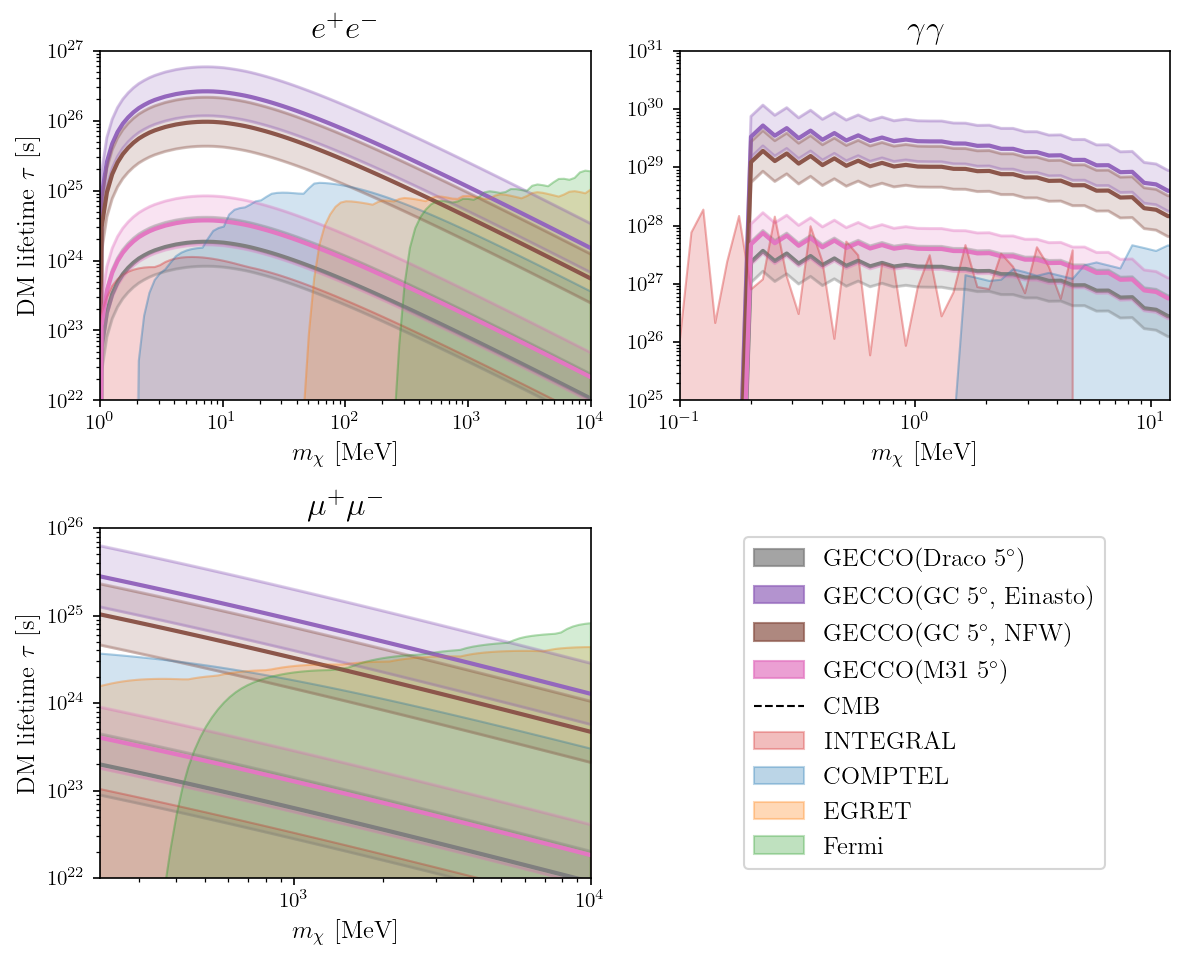

In [30]:
DEC_DATA_FILE = "../results/single_channel_dec.hdf5"
datafile_dec = h5py.File(DEC_DATA_FILE, "r")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6.5))
fig.dpi = 150
axes_idxs = [(0, 0), (0, 1), (1, 0)]
last_axis = axes[1][1]
ylabel = r"$\mathrm{DM} \ \mathrm{lifetime} \ \tau \ [\mathrm{s}]$"
xlabel = r"$m_{\chi} \ [\mathrm{MeV}]$"

ylims = [[1e22, 1e27], [1e25, 1e31], [1e22, 1e26]]
xmins = [1, 0.1, mmu * 2 + 10]
xmaxs = [1e4, 12, 1e4]
titles = [r"$e^{+}e^{-}$", r"$\gamma\gamma$", r"$\mu^{+}\mu^{-}$"]

for i, (channel, idx) in enumerate(zip(datafile_dec.keys(), axes_idxs)):
    axis = axes[idx[0]][idx[1]]
    group = datafile_dec[channel]
    masses = group["masses"][:]
    cmb = group["cmb"][:]
    vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
    cmb_s_wave = 1 / cmb
    cmb_p_wave = 1 / (vratios * cmb)

    gecco5 = group["gecco-5sigma"]
    gecco25 = group["gecco-25sigma"]
    for obs in gecco5.keys():
        conf = {"color": color_dict[obs]}
        low = 1 / gecco25[obs][:]
        high = 1 / gecco5[obs][:]
        avg = np.exp(np.log(high * low) / 2.0)
        axis.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
        axis.plot(masses, avg, lw=2.0, **conf)
        axis.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
        axis.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

    for tel in existings:
        conf = {"color": color_dict[tel], "alpha": 0.2, "lw": 1.0}
        data = 1 / group[tel][:]
        axis.fill_between(masses, data, 0.0, where=data > 1e20, **conf)
        axis.plot(masses, data, **conf)

    if idx[1] == 0:
        axis.set_ylabel(ylabel, fontsize=12)
    axis.set_xlabel(xlabel, fontsize=12)
    axis.set_yscale("log")
    axis.set_xscale("log")
    axis.set_ylim(ylims[i])
    axis.set_xlim(xmins[i], xmaxs[i])
    axis.set_title(titles[i], fontsize=16)
    # plt.legend(bbox_to_anchor=(1.0,1.0))

# cmb_epem = np.genfromtxt("gecko/data/cmb_epem.csv", delimiter=",")
# axes[0,0].plot(1e3 * cmb_epem.T[0], cmb_epem.T[1], c='k', ls='--', lw=1)

last_axis.clear()
last_axis.set_axis_off()

handels = []

# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=5$",lw=1.5, ls=linestyles['dashed'])]
# handels += [mpl.lines.Line2D([0],[0],color='k', label=r"$\mathrm{SNR}=25$",lw=1.5, ls=linestyles['dotted'])]

for key in geccos:
    handels += [
        mpl.patches.Patch(
            color=color_dict[key], label="GECCO" + label_dict[key], alpha=0.7
        )
    ]
handels += [
    mpl.lines.Line2D([0], [0], color="k", label=r"$\mathrm{CMB}$", ls="--", lw=1)
]
for key in existings:
    handels += [
        mpl.patches.Patch(color=color_dict[key], label=label_dict[key], alpha=0.3)
    ]
last_axis.legend(handles=handels, loc="center", fontsize=12)

plt.tight_layout()
# plt.savefig('figures/single_channel_dec_banded.pdf')
datafile_dec.close()

## Higgs-Portal

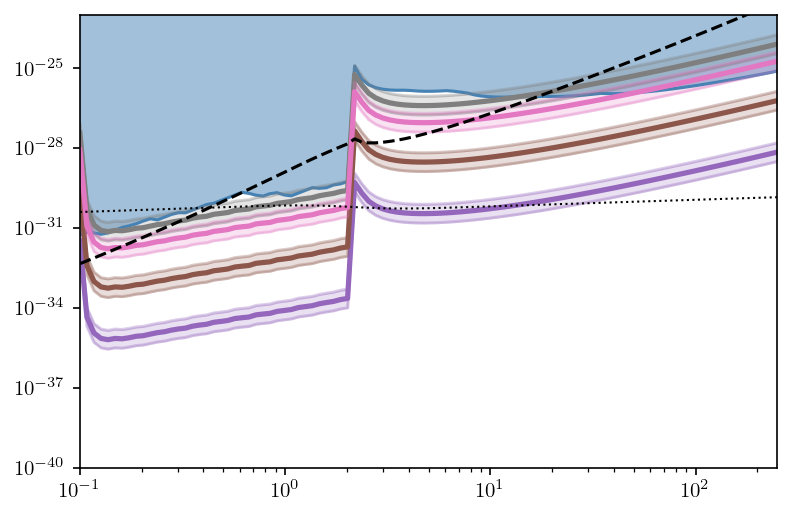

In [78]:
datafile = h5py.File("../results/higgs_portal_0_5.hdf5", "r")


plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-40

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
rd = datafile["relic-density"][:]

vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
cmb_s_wave = cmb
cmb_p_wave = vratios * cmb

existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.5)
plt.plot(masses, existing)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

plt.plot(masses, cmb_p_wave, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(np.min(masses), np.max(masses))

datafile.close()

(0.1, 250.0)

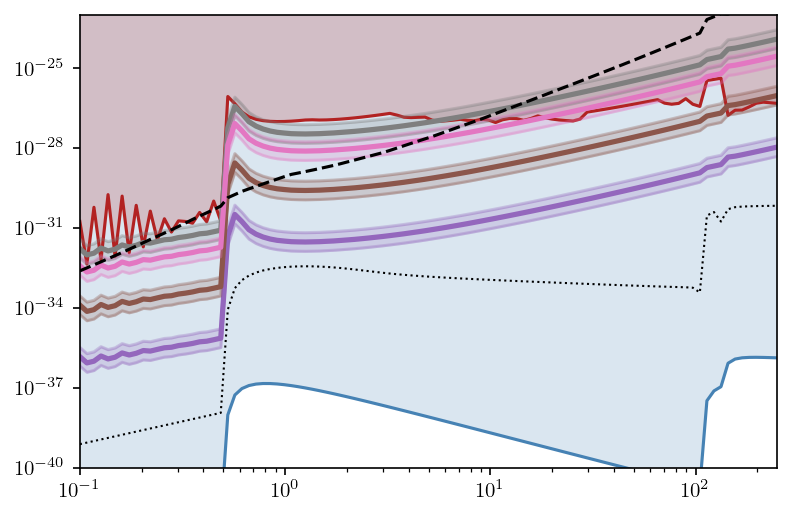

In [80]:
datafile = h5py.File("../results/higgs_portal_1_5.hdf5", "r")

plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-40

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
pheno = datafile["pheno"][:]
rd = datafile["relic-density"][:]

vratios = np.array([(1e-3 / vx_cmb(mx, 1e-4)) ** 2 for mx in masses])
cmb_s_wave = cmb
cmb_p_wave = vratios * cmb

plt.fill_between(masses, pheno, ymax, alpha=0.2)
plt.plot(masses, pheno)

existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.2)
plt.plot(masses, existing)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)


plt.plot(masses, cmb_p_wave, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(np.min(masses), np.max(masses))

# datafile.close()

## Kinetic Mixing

In [3]:
from hazma.parameters import electron_mass as me

<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)
<ipython-input-17-40975a476a8d>:35: RuntimeWarning: overflow encountered in multiply
  avg = np.exp(np.log(high*low)/2.0)


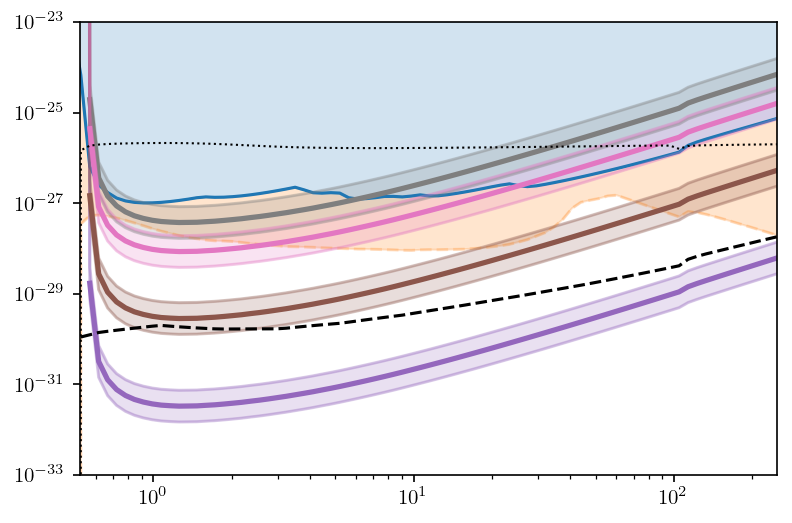

In [17]:
datafile = h5py.File("../results/kinetic_mixing.hdf5", "r")


plt.figure(dpi=150)

ymax = 1e-23
ymin = 1e-33

masses = datafile["masses"][:]
gecco5 = datafile["gecco-5sigma"]
gecco25 = datafile["gecco-25sigma"]

egret = datafile["egret"][:]
comptel = datafile["comptel"][:]
fermi = datafile["fermi"][:]
integral = datafile["integral"][:]
cmb = datafile["cmb"][:]
pheno = datafile["pheno"][:]
rd = datafile["relic-density"][:]


existing = np.array(
    [np.min([e, c, f, i]) for e, c, f, i in zip(egret, comptel, fermi, integral)]
)
existing = np.clip(existing, ymin, ymax)
plt.fill_between(masses, existing, ymax, alpha=0.2, color=mpl_conf.BLUE)
plt.plot(masses, existing, color=mpl_conf.BLUE)

plt.fill_between(masses, pheno, existing, alpha=0.2, color=mpl_conf.ORANGE)
plt.plot(masses, pheno, alpha=0.2, ls="--", color=mpl_conf.ORANGE)


for obs in gecco5.keys():
    conf = {"color": color_dict[obs]}
    high = gecco5[obs][:]
    low = gecco25[obs][:]
    avg = np.exp(np.log(high * low) / 2.0)
    plt.fill_between(masses, high, low, lw=1, alpha=0.2, **conf)
    plt.plot(masses, avg, lw=2.5, **conf)
    plt.plot(masses, high, lw=1.5, alpha=0.3, ls="-", **conf)
    plt.plot(masses, low, lw=1.5, alpha=0.3, ls="-", **conf)

plt.plot(masses, cmb, ls="--", c="k")
plt.plot(masses, rd, ls="dotted", c="k", lw=1)

plt.yscale("log")
plt.xscale("log")
plt.ylim([ymin, ymax])
plt.xlim(me * 1.02, np.max(masses))

datafile.close()